<h1>Dinamita de datos</h1>
<ul>Integrantes:
<li>Juan David Parra Goméz </li>
<li>Leidy Johana Cardozo Guerrero </li>
<li>Laura Sofia Huertas</li>
</ul>
<h2>Análisis de datos</h2> 
<img src="ciclo.jpg" width=500 >
<p>Ciclo de análisis de datos propuestos por IBM</p>

<h2>Business Understanding</h2>
<p>Nuestro objetivo en este analisis sera:</p>
<b>Analizar la relación entre la percepción de seguridad, la incidencia de delitos y su impacto en el clima de negocios en Bogotá</b>



<h2>Analytic Approach</h2>



<h2>Data Requiriments</h2>
Leidy nos dice esto vvvvvvvvvvvvvvvvvvvvvvvvvvvvv

<h2>Data Preparation</h2>


<h3>Lectura de documentos donde estan los datos proporcionados</h3>

In [268]:
pip install seaborn pandas numpy openpyxl scipy scikit-learn KModes

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

<h4>datos del ECN

2022

In [4]:
ruta ="Bases de datos/1.4. Bases CCB/ECN/2022/Base_2022.csv"
listaColumnasECN = ['P56',
                    'P57',
                    'P58', 
                    'P59.1', 'P59.2',  'P59.3', 'P59.4',  'P59.5',    'P59.6',  'P59.7',    'P59.8',   'P59.9', 'P60',
                    #hurto,delitosinfo, fraude, extorsion, ESTAFA,   hurto auto, ataque,  vandalsimo, secuestro, denuncio
                    'P61',
                    #1	Aplicación a denunciar
                    #2	Casa de Justicia (Comisaría de Familia)
                    #3	Inspección de policía (Estación de Policía) 
                    #4	URI de la Fiscalía
                    #5	GAULA
                    'F.EXPANSIÓN'
                    ]
ECN2022 = pd.read_csv(ruta,encoding='iso-8859-1')
ECN2022.head(20)
#ECN2022 = ECN2022.loc[:, listaColumnasECN]
#ECN2022.sort_values(by='Id_encuestado')


,Id_encuesta,Id_encuestado,F1,F1.1,F2,F3,F4,P1,P2,P3,...,P59.4,P59.5,P59.6,P59.7,P59.8,P59.9,P60,P61,P63,F.EXPANSIÓN
0,001GDC_Clima_de_los_Negocios,150225363,3,1,11001,3,4,2,37.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35.528302
1,001GDC_Clima_de_los_Negocios,150179733,3,1,11001,1,2,1,32.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.207692
2,001GDC_Clima_de_los_Negocios,151996437,1,1,11001,2,4,1,54.0,4,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,3.0,NaN,37.800000
3,001GDC_Clima_de_los_Negocios,150250681,3,1,11001,1,2,1,54.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.207692
4,001GDC_Clima_de_los_Negocios,150187440,3,1,11001,1,1,1,19.0,4,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,65.813901
5,001GDC_Clima_de_los_Negocios,151105696,4,1,11001,1,1,3,42.0,4,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,65.813901
6,001GDC_Clima_de_los_Negocios,153442231,3,1,11001,2,4,1,55.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,37.800000
7,001GDC_Clima_de_los_Negocios,150227059,1,1,11001,2,2,2,45.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.980519
8,001GDC_Clima_de_los_Negocios,151642971,3,1,11001,3,4,1,72.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35.528302
9,001GDC_Clima_de_los_Negocios,152633783,1,1,11001,2,4,1,59.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,37.800000


<h4>datos del EPV

2019-1

In [156]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2019/2019-1/EPV_2019_1.xlsx"
EPV20191 = pd.read_excel(ruta)
EPV20191.head(3)

,ID_ENCUESTA,F2,EDAD,P6,P102,P103,P106,P128,P109,P117,...,P407_2,P407_3,P407_1_1,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6,FEX
0,ik4443099b-dfa6-43cf-b4c6-42cae171a954,11,26.0,7,2.0,4.0,4.0,5.0,1.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2277.001543
1,ik3a9fed64-1cb4-422b-b18d-c4fc8759a7fe,14,30.0,1,4.0,4.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.709194
2,ikb82a37d9-f467-4784-b3fb-37d90818382a,14,34.0,2,4.0,4.0,4.0,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.709194


2019-2

In [157]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2019/2019-2/EPV_2019_2.xlsx"
EPV20192 = pd.read_excel(ruta)
EPV20192.head(3)

,ID_ENCUESTA,F2,EDAD,P6,P102,P103,P106,P128,P109,P117,...,P407_2,P407_3,P407_1_1,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6,FEX
0,ik4443099b-dfa6-43cf-b4c6-42cae171a954,11,26.0,7,2.0,4.0,4.0,5.0,1.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2277.001543
1,ik3a9fed64-1cb4-422b-b18d-c4fc8759a7fe,14,30.0,1,4.0,4.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.709194
2,ikb82a37d9-f467-4784-b3fb-37d90818382a,14,34.0,2,4.0,4.0,4.0,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.709194


2020

In [158]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2020/EPV_2020.xlsx"
EPV2020 = pd.read_excel(ruta)
EPV2020.head(3)

,Id_Encuesta,Id_Encuestado,LOCALIDAD,P1.1 Rango de edad,ESTRATO,P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO),P6,P7,P106,P102,...,P407_C,P407_1,P412_A,P412_B,P412_C,P412_D,P412_E,P412_F,CLAVE,FEX
0,o 020SEG_Percepción_y_Victimización_en_Bogotá,1,Rafael Uribe,De 36 a 45 años,Estrato 3,43,Independiente,Femenino,Ha Aumentado,Inseguro,...,NaN,Todos los días,NaN,NaN,NaN,NaN,NaN,NaN,Rafael UribeEstrato 3,1534.636400
1,o 020SEG_Percepción_y_Victimización_en_Bogotá,2,Usaquén,De 36 a 45 años,Estrato 4,37,Empleado,Femenino,Ha disminuido,Seguro,...,NaN,De vez en cuando en el mes,NaN,NaN,NaN,NaN,NaN,NaN,UsaquénEstrato 4,1543.954394
2,o 020SEG_Percepción_y_Victimización_en_Bogotá,3,Chapinero,Más de 55 años,Estrato 6,68,Independiente,Masculino,Ha Aumentado,Seguro,...,Si,Algunos días de la semana,NaN,NaN,NaN,NaN,NaN,NaN,ChapineroEstrato 6,1560.374824


2021

In [159]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2021/EPV_2021.xlsx"
EPV2021 = pd.read_excel(ruta)
EPV2021.head(3)

,NUMERO,CONSECUTIVO,GENERO,EDAD,P1_RANGO_EDAD,LOCALIDAD,ESTRATO,P106,P102,P103,...,P407_C,P407_1,P412_A,P412_B,P412_C,P412_D,P412_E,P412_F,P6,FEX
0,37,1,1,29,3,1,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1100.314
1,21240,2,2,22,2,11,2,4,2,2,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1024.945
2,15465,3,1,62,10,10,3,4,1,2,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,6,1555.948


2022

In [160]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2022/EPV_2022.xlsx"
EPV2022 = pd.read_excel(ruta)
EPV2022.head(3)

,ID_ENCUESTA,ID_ENCUESTADO,LOCALIDAD,SEXO,ESTRATO,EDAD,EDADRANGO,P6,P106,P102,...,P407_1_1,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6,FEX,_UUID,_INDEX
0,020SEG_PercepciÃ³n_y_VictimizaciÃ³n_en_BogotÃ¡,182915053,4,1,1,41.0,3,2,4,2,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,471.489789,5ba378bb-0405-4718-b40b-ccc8ab88d146,1830
1,020SEG_PercepciÃ³n_y_VictimizaciÃ³n_en_BogotÃ¡,184039071,5,1,1,71.0,6,6,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.489789,587271a5-1b42-419a-8785-624eb66debe5,3407
2,020SEG_PercepciÃ³n_y_VictimizaciÃ³n_en_BogotÃ¡,184116519,5,1,1,64.0,5,2,4,2,...,1.0,5.0,5.0,5.0,5.0,5.0,5.0,471.489789,8bbec0be-3e57-4193-9ee2-cbb42771eabf,3586


2023

In [161]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2023/EPV_2023.xlsx"
EPV2023 = pd.read_excel(ruta)
EPV2023.head(3)

,ID_INTERNO,NOMBRE_LOCALIDAD,NOMBRE_BARRIO,SEXO,ESTRATO,EDAD_EXACTA,EDAD_RANGO,P6_2,P6_2_1,P106,...,P407_3,P407_1_1,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6,ID,FEX
0,9719,PUENTE ARANDA,GALAN,2,3,40.0,3,1,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252055819,231.210990
1,13668,FONTIBON,BELEN FONTIBON,2,3,84.0,6,5,NaN,4,...,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,253885992,214.063311
2,12647,ANTONIO NARINO,EDUARDO FREY,2,3,70.0,5,5,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253166336,44.118103


<h3>ETL</h3>

<h4>ECN

FActor de expanción función

In [5]:
def factor_exp(df, nombre_factor):
    df_expandido = pd.DataFrame()
    
    for columna in df.columns:
        if columna != nombre_factor:
            df_expandido[columna] = df[columna].repeat(df[nombre_factor].astype(int))
    return df_expandido


In [6]:
ECN2022EXP = factor_exp(ECN2022, 'F.EXPANSIÓN')

C:\Users\USER\AppData\Local\Temp\ipykernel_15908\2041116711.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[columna] = df[columna].repeat(df[nombre_factor].astype(int))
C:\Users\USER\AppData\Local\Temp\ipykernel_15908\2041116711.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[columna] = df[columna].repeat(df[nombre_factor].astype(int))
C:\Users\USER\AppData\Local\Temp\ipykernel_15908\2041116711.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

<h2>Data Collection and Data Understanding</h2>



<h3>ECN

<h4>2022

Comparativa  factores de incertidumbre

<Axes: >

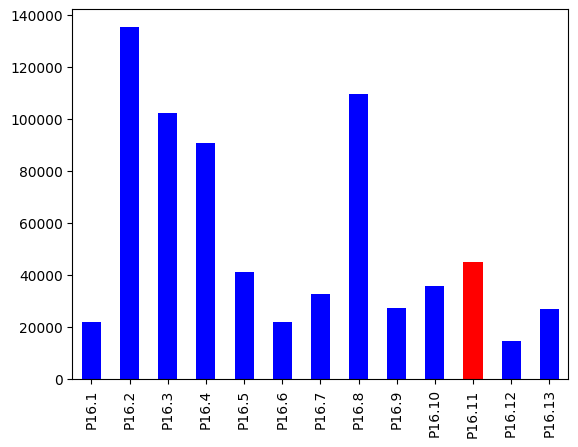

In [164]:
listaP16 =["P16.1","P16.2","P16.3","P16.4","P16.5","P16.6","P16.7",
           "P16.8","P16.9","P16.10","P16.11","P16.12","P16.13"]
preguntaP16 = ECN2022EXP[listaP16].sum()
preguntaP16.plot(kind="bar",color=['red' if i == 10 else 'blue' for i in range(len(preguntaP16))])

Aspecto del clima de negocxio afectados

<Axes: >

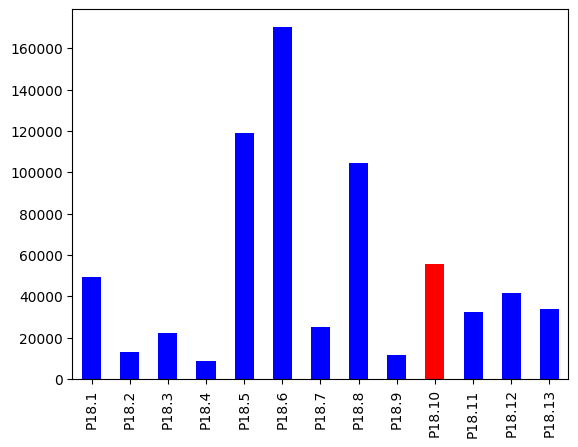

In [165]:
listaP18 = ["P18.1", "P18.2", "P18.3", "P18.4", "P18.5", "P18.6", "P18.7",
            "P18.8", "P18.9", "P18.10", "P18.11", "P18.12", "P18.13"]
preguntaP18 = ECN2022EXP[listaP18].sum()
preguntaP18.plot(kind="bar",color=['red' if i == 9 else 'blue' for i in range(len(preguntaP18))])

Análisis de sector

<Axes: >

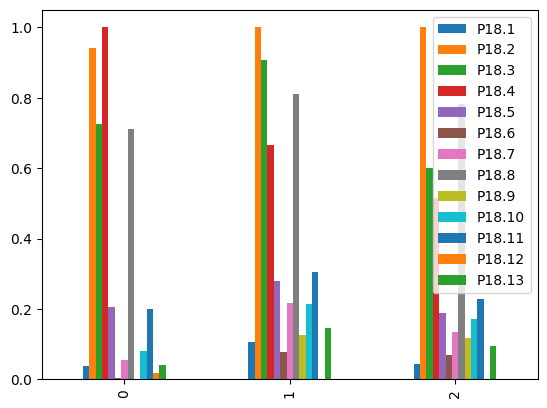

In [166]:
# Comparativa  factores de incertidumbre dividido por sectores
from sklearn.preprocessing import MinMaxScaler
sector = ECN2022EXP.groupby("F3").agg({"P16.1":"sum","P16.2":"sum","P16.3":"sum","P16.4":"sum",
"P16.5":"sum","P16.6":"sum","P16.7":"sum","P16.8":"sum",
"P16.9":"sum","P16.10":"sum","P16.11":"sum","P16.12":"sum","P16.13":"sum"})

#Se normaliza para comparar entre sectores
scaler = MinMaxScaler()
sector_normalizado = scaler.fit_transform(sector.transpose())
sector_normalizado = pd.DataFrame(sector_normalizado.transpose())
sector_normalizado.columns = listaP18 
sector_normalizado.plot(kind="bar")

<Axes: >

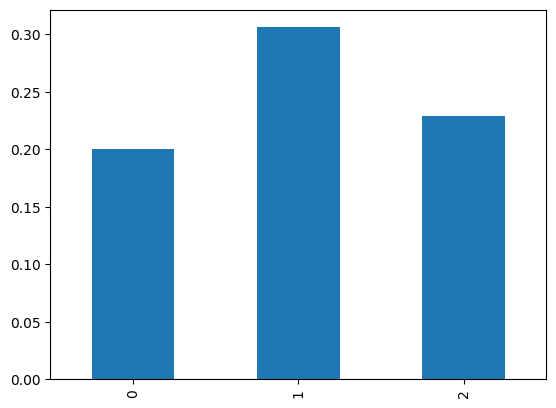

In [167]:
#Comparativa  factores de incertidumbre para el aspecto de seguridad en clima de negocios mas afectados
sector_normalizado["P18.11"].plot(kind="bar")

<Axes: >

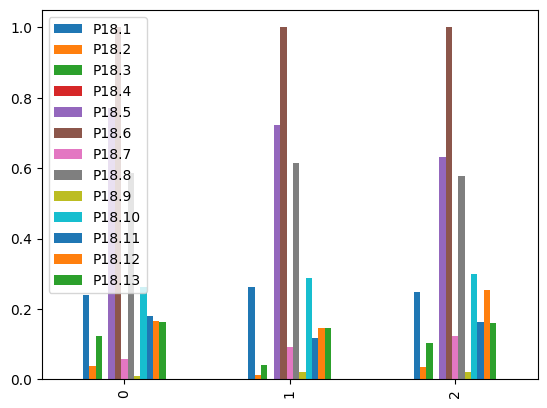

In [168]:
#Analisis de aspectos clima de negocios mas afectados dividido por sectores
sector = ECN2022EXP.groupby("F3").agg({"P18.1":"sum","P18.2":"sum","P18.3":"sum","P18.4":"sum",
                                       "P18.5":"sum","P18.6":"sum","P18.7":"sum","P18.8":"sum",
                                       "P18.9":"sum","P18.10":"sum","P18.11":"sum","P18.12":"sum","P18.13":"sum"})

#Se normaliza para comparar entre sectores
scaler = MinMaxScaler()
sector_normalizado = scaler.fit_transform(sector.transpose())
sector_normalizado = pd.DataFrame(sector_normalizado.transpose())
sector_normalizado.columns = listaP18 
sector_normalizado.plot(kind="bar")

<Axes: >

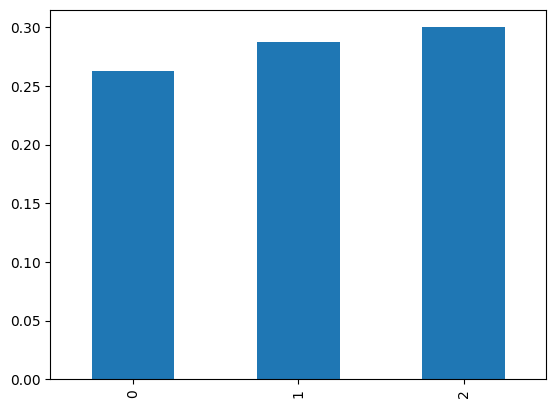

In [169]:
#Comparacion entre sectores para el aspecto de seguridad en clima de negocios mas afectados
sector_normalizado["P18.10"].plot(kind="bar")

comportamiento primer semestre 2022 vs segundo semetre 2021 para situación económica por sectores

<Axes: xlabel='F3', ylabel='count_normalized'>

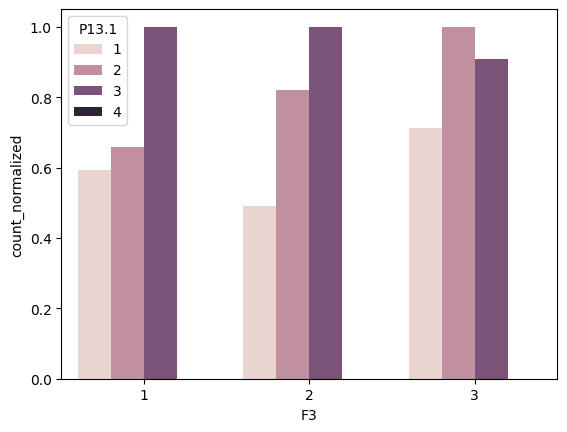

In [170]:
comportamiento = ECN2022EXP[["F3","P13.1"]]

comportamiento_agrupado = comportamiento.groupby(["F3","P13.1"]).size()
comportamiento_df = comportamiento_agrupado.reset_index(name='count')

#normalizando para comparar
xmax = comportamiento_df.groupby('F3')['count'].max()
xmin = comportamiento_df.groupby('F3')['count'].min()
comportamiento_df['count_normalized'] = comportamiento_df.groupby('F3')['count'].transform(lambda x: (x - xmin[x.name])/ (xmax[x.name]-xmin[x.name]))

sns.barplot(data=comportamiento_df, x='F3', y='count_normalized', hue='P13.1')

<Axes: xlabel='F3', ylabel='count_normalized'>

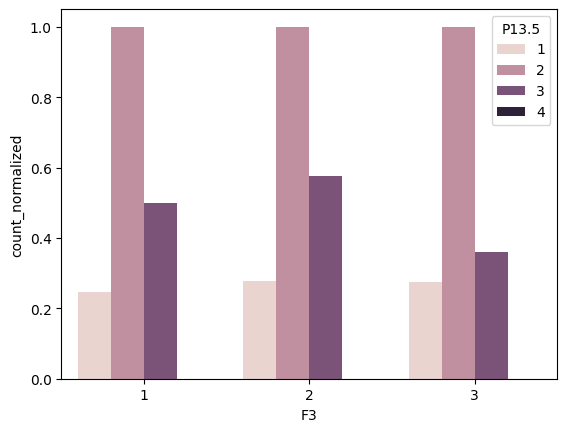

In [171]:
inversion = ECN2022EXP[["F3","P13.5"]]

inversion_agrupado = inversion.groupby(["F3","P13.5"]).size()
inversion_df = inversion_agrupado.reset_index(name='count')

#normalizando para comparar
xmax = inversion_df.groupby('F3')['count'].max()
xmin = inversion_df.groupby('F3')['count'].min()
inversion_df['count_normalized'] = inversion_df.groupby('F3')['count'].transform(lambda x: (x - xmin[x.name])/ (xmax[x.name]-xmin[x.name]))

sns.barplot(data=inversion_df, x='F3', y='count_normalized', hue='P13.5')

comportamiento  2022 vs 2021 para seguridad

<Axes: xlabel='F3', ylabel='count_normalized'>

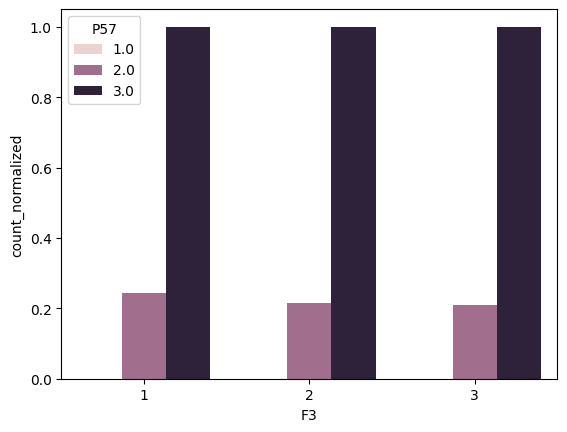

In [172]:
seguridad = ECN2022EXP[["F3","P57"]]

seguridad_agrupado = seguridad.groupby(["F3","P57"]).size()
seguridad_df = seguridad_agrupado.reset_index(name='count')

#normalizando para comparar
xmax = seguridad_df.groupby('F3')['count'].max()
xmin = seguridad_df.groupby('F3')['count'].min()
seguridad_df['count_normalized'] = seguridad_df.groupby('F3')['count'].transform(lambda x: (x - xmin[x.name])/ (xmax[x.name]-xmin[x.name]))

sns.barplot(data=seguridad_df, x='F3', y='count_normalized', hue="P57")

Empresa victima de algun delito 2022

<Axes: xlabel='F3', ylabel='count_normalized'>

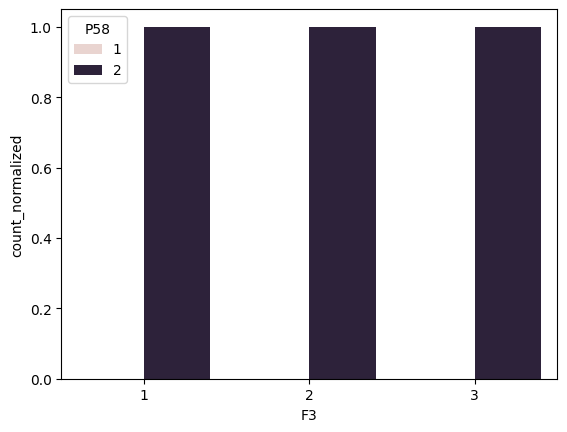

In [173]:
victima = ECN2022EXP[["F3","P58"]]

victima_agrupado = victima.groupby(["F3","P58"]).size()
victima_df = victima_agrupado.reset_index(name='count')

#normalizando para comparar
xmax = victima_df.groupby('F3')['count'].max()
xmin = victima_df.groupby('F3')['count'].min()
victima_df['count_normalized'] = victima_df.groupby('F3')['count'].transform(lambda x: (x - xmin[x.name])/ (xmax[x.name]-xmin[x.name]))

sns.barplot(data=victima_df, x='F3', y='count_normalized', hue="P58")


Comparacion clima para hacer negocios seguridad

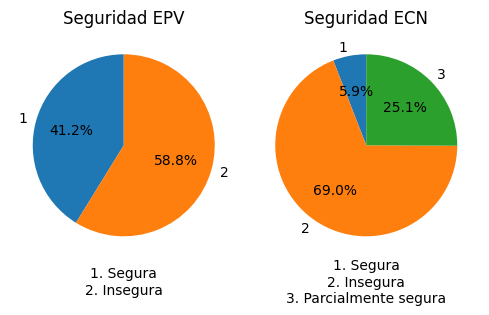

In [174]:
seguridadEPV = EPV2022EXP["P446"]
seguridadEPV = seguridadEPV.groupby(seguridadEPV).size()
seguridadEPV = seguridadEPV.reset_index(name='count')

seguridadECN = ECN2022EXP["P56"]
seguridadECN = seguridadECN.groupby(seguridadECN).size()
seguridadECN = seguridadECN.reset_index(name='count')
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 10))

ax1.pie(seguridadEPV['count'], labels=seguridadEPV[seguridadEPV.columns[0]], autopct='%1.1f%%', startangle=90)
ax1.set_title('Seguridad EPV')

ax2.pie(seguridadECN['count'], labels=seguridadECN[seguridadECN.columns[0]], autopct='%1.1f%%', startangle=90)
ax2.set_title('Seguridad ECN')

ax1.text(0.5, -0.1, "1. Segura\n2. Insegura", horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.5, -0.1, "1. Segura\n2. Insegura\n3. Parcialmente segura", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

plt.tight_layout()

plt.show()


Percepcion de seguridad empresarial por sectores 

<Axes: xlabel='F3', ylabel='count_normalized'>

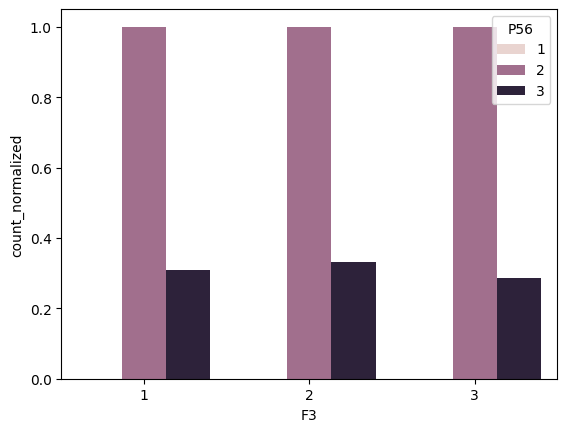

In [223]:
percepcion_seguridad = ECN2022EXP[["F3","P56"]]

percepcion_seguridad = percepcion_seguridad.groupby(["F3","P56"]).size()
percepcion_seguridad_df = percepcion_seguridad.reset_index(name='count')
percepcion_seguridad_df.head() 

#normalizando para comparar
xmax = percepcion_seguridad_df.groupby('F3')['count'].max()
xmin = percepcion_seguridad_df.groupby('F3')['count'].min()
percepcion_seguridad_df['count_normalized'] = percepcion_seguridad_df.groupby('F3')['count'].transform(lambda x: (x - xmin[x.name])/ (xmax[x.name]-xmin[x.name]))

sns.barplot(data=percepcion_seguridad_df, x='F3', y='count_normalized', hue="P56")

Percepcion de seguridad empresarial por tamaño

<Axes: xlabel='F4', ylabel='count_normalized'>

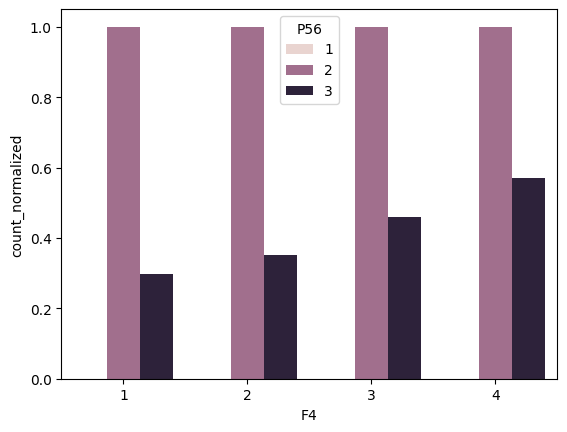

In [226]:
percepcion_seguridad = ECN2022EXP[["F4","P56"]]

percepcion_seguridad = percepcion_seguridad.groupby(["F4","P56"]).size()
percepcion_seguridad_df = percepcion_seguridad.reset_index(name='count')
percepcion_seguridad_df.head() 

#normalizando para comparar
xmax = percepcion_seguridad_df.groupby('F4')['count'].max()
xmin = percepcion_seguridad_df.groupby('F4')['count'].min()
percepcion_seguridad_df['count_normalized'] = percepcion_seguridad_df.groupby('F4')['count'].transform(lambda x: (x - xmin[x.name])/ (xmax[x.name]-xmin[x.name]))

sns.barplot(data=percepcion_seguridad_df, x='F4', y='count_normalized', hue="P56")

Percepcion de seguridad empresarial por años de la empresa

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\842161261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percepcion_seguridad['P6'] = pd.cut(percepcion_seguridad['P6'], bins=10)
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\842161261.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percepcion_seguridad = percepcion_seguridad.groupby(["P6", "P56"]).size().reset_index(name='count')
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\842161261.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

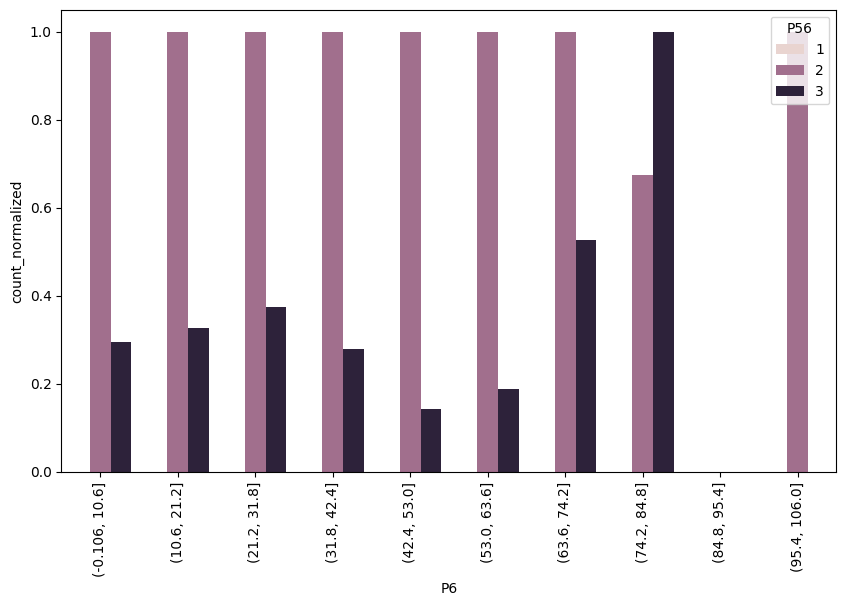

In [262]:
percepcion_seguridad = ECN2022EXP[["P6", "P56"]]

# Definir los bins para la columna 'P6'
percepcion_seguridad['P6'] = pd.cut(percepcion_seguridad['P6'], bins=10)

# Agrupar y contar los valores
percepcion_seguridad = percepcion_seguridad.groupby(["P6", "P56"]).size().reset_index(name='count')

# Normalizar los valores
xmax = percepcion_seguridad.groupby("P6")['count'].max()
xmin = percepcion_seguridad.groupby("P6")['count'].min()
percepcion_seguridad['count_normalized'] = percepcion_seguridad.groupby('P6')['count'].transform(lambda x: (x - xmin[x.name]) / (xmax[x.name] - xmin[x.name]))




# Graficar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=percepcion_seguridad, x='P6', y='count_normalized', hue='P56')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\3473886026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percepcion_seguridad['P6'] = pd.cut(percepcion_seguridad['P6'], bins=10)
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\3473886026.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percepcion_seguridad = percepcion_seguridad.groupby(["P6","P56"]).size()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(-0.106, 10.6]'),
  Text(1, 0, '(10.6, 21.2]'),
  Text(2, 0, '(21.2, 31.8]'),
  Text(3, 0, '(31.8, 42.4]'),
  Text(4, 0, '(42.4, 53.0]'),
  Text(5, 0, '(53.0, 63.6]'),
  Text(6, 0, '(63.6, 74.2]'),
  Text(7, 0, '(74.2, 84.8]'),
  Text(8, 0, '(84.8, 95.4]'),
  Text(9, 0, '(95.4, 106.0]')])

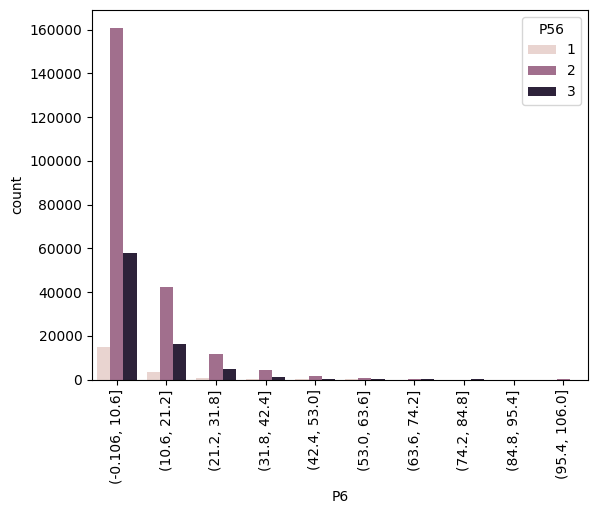

In [243]:
percepcion_seguridad = ECN2022EXP[["P6","P56"]]
percepcion_seguridad['P6'] = pd.cut(percepcion_seguridad['P6'], bins=10)
percepcion_seguridad = percepcion_seguridad.groupby(["P6","P56"]).size()
percepcion_seguridad_df = percepcion_seguridad.reset_index(name='count')
percepcion_seguridad_df.head(20)

sns.barplot(data=percepcion_seguridad_df, x='P6', y='count', hue="P56")
plt.xticks(rotation=90)

Tamaño vs tiempo de empresa

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\1974965786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percepcion_seguridad['P6'] = pd.cut(percepcion_seguridad['P6'], bins=10)
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\1974965786.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percepcion_seguridad = percepcion_seguridad.groupby(["P6", "F4"]).size().reset_index(name='count')


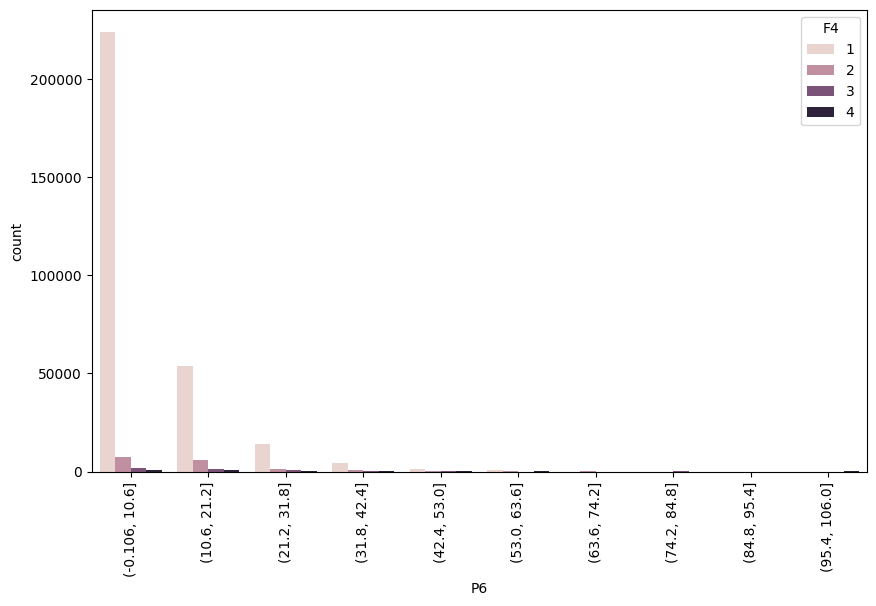

In [266]:
# Seleccionar las columnas 'P6' y 'P56'
percepcion_seguridad = ECN2022EXP[["F4", "P6"]]

# Dividir la columna 'P6' en 10 bins
percepcion_seguridad['P6'] = pd.cut(percepcion_seguridad['P6'], bins=10)

# Agrupar y contar los valores
percepcion_seguridad = percepcion_seguridad.groupby(["P6", "F4"]).size().reset_index(name='count')

# Graficar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=percepcion_seguridad, x='P6', y='count', hue='F4')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\2371770628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percepcion_seguridad['P6'] = pd.cut(percepcion_seguridad['P6'], bins=10)
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\2371770628.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percepcion_seguridad = percepcion_seguridad.groupby(["P6", "F4"]).size().reset_index(name='count')
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\2371770628.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versi

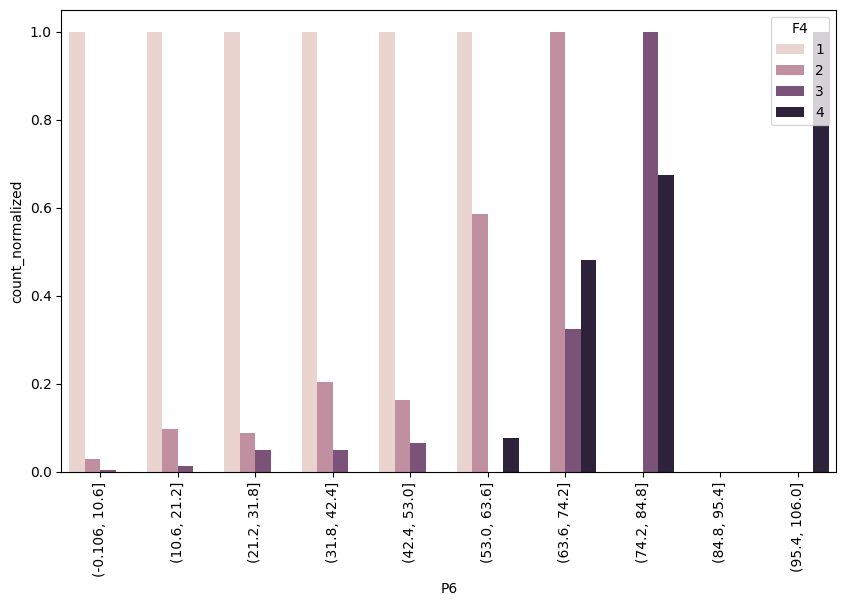

In [267]:
percepcion_seguridad = ECN2022EXP[["F4", "P6"]]

# Definir los bins para la columna 'P6'
percepcion_seguridad['P6'] = pd.cut(percepcion_seguridad['P6'], bins=10)

# Agrupar y contar los valores
percepcion_seguridad = percepcion_seguridad.groupby(["P6", "F4"]).size().reset_index(name='count')

# Normalizar los valores
xmax = percepcion_seguridad.groupby("P6")['count'].max()
xmin = percepcion_seguridad.groupby("P6")['count'].min()
percepcion_seguridad['count_normalized'] = percepcion_seguridad.groupby('P6')['count'].transform(lambda x: (x - xmin[x.name]) / (xmax[x.name] - xmin[x.name]))




# Graficar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=percepcion_seguridad, x='P6', y='count_normalized', hue='F4')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

<h3>EPV

<h4>2022

In [177]:
EPV2022EXP = factor_exp(EPV2022,"FEX")

Comparacion modos de informarse de la seguridad 

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\1391984213.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=informarse_agrupado, x="P128", y='count',palette=['red' if i == 4 else 'blue' for i in range(len(etiquetas))])


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Experiencia personal'),
  Text(1, 0, 'Experiencias de familiares'),
  Text(2, 0, 'Comentarios de la gente'),
  Text(3, 0, 'Redes sociales'),
  Text(4, 0, 'Noticieros de televisión'),
  Text(5, 0, 'Revistas'),
  Text(6, 0, 'Radio'),
  Text(7, 0, 'Periódicos'),
  Text(8, 0, 'Páginas oficiales en internet')])

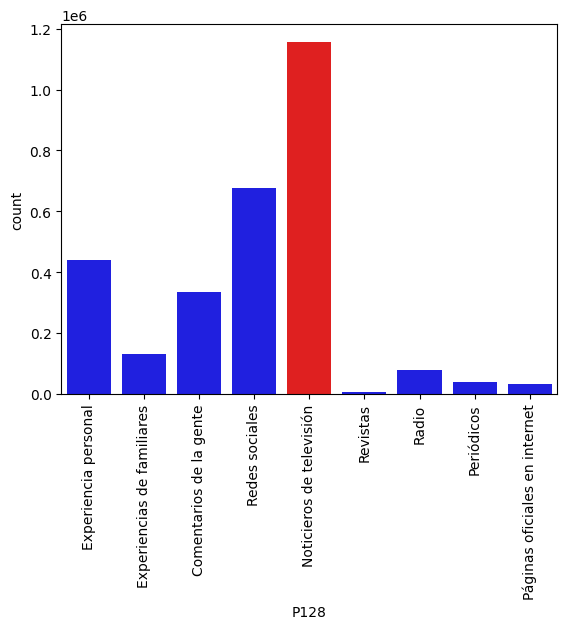

In [178]:
informarse = EPV2022EXP[["P128"]]

informarse_agrupado = informarse.groupby(["P128"]).size()
informarse_agrupado= informarse_agrupado.reset_index(name='count')
#normalizando para comparar
etiquetas = [
    "Experiencia personal",
    "Experiencias de familiares",
    "Comentarios de la gente",
    "Redes sociales",
    "Noticieros de televisión",
    "Revistas",
    "Radio",
    "Periódicos",
    "Páginas oficiales en internet"
]

informarse_agrupado['P128'] = informarse_agrupado['P128'].astype(str)  # Asegurar que P128 sea de tipo string
informarse_agrupado.replace({"P128": {str(i): etiquetas[i-1] for i in range(1, len(etiquetas)+1)}}, inplace=True)

sns.barplot(data=informarse_agrupado, x="P128", y='count',palette=['red' if i == 4 else 'blue' for i in range(len(etiquetas))])

plt.xticks(rotation=90)

comportamiento primer semestre 2022 vs segundo semetre 2021 para inversion


<h2>Modelo

iteracion 1

In [284]:

from kmodes.kmodes import KModes

# Seleccionar las columnas relevantes
datos = ECN2022EXP[["P18.10", "P18.11", "F4", "P56"]]



# Cambiar los valores según las correspondencias dadas
datos['P18.10'] = datos['P18.10'].replace({1: 'Afecto Seguridad'})
datos['P18.11'] = datos['P18.11'].replace({1: 'Afecto Inversión'})
datos['F4'] = datos['F4'].replace({1: 'Microempresa', 2: 'Pequeña Empresa', 3: 'Mediana Empresa', 4: 'Grande Empresa'})
datos['P56'] = datos['P56'].replace({1: 'Segurida ', 2: 'Insegura', 3: 'Parcialmente Segura'})


# Convertir las variables numéricas a categóricas si es necesario
datos['P18.10'] = datos['P18.10'].astype(str)
datos['P18.11'] = datos['P18.11'].astype(str)
datos['F4'] = datos['F4'].astype(str)
datos['P56'] = datos['P56'].astype(str)
# Crear un objeto KModes
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

# Ajustar el modelo a tus datos
clusters = km.fit_predict(datos)

# Mostrar los clusters asignados a cada instancia
print(clusters)

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\3568669344.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['P18.10'] = datos['P18.10'].replace({1: 'Afecto Inseguridad'})
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\3568669344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['P18.11'] = datos['P18.11'].replace({1: 'Afecto Inversión'})
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\3568669344.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 70741, cost: 84708.0
Run 1, iteration: 2/100, moves: 1579, cost: 84708.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 110631.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11753, cost: 52226.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28868, cost: 64606.0
Run 4, iteration: 2/100, moves: 607, cost: 64606.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 26988, cost: 110631.0
Best run was number 3
[1 1 1 ... 4 4 4]


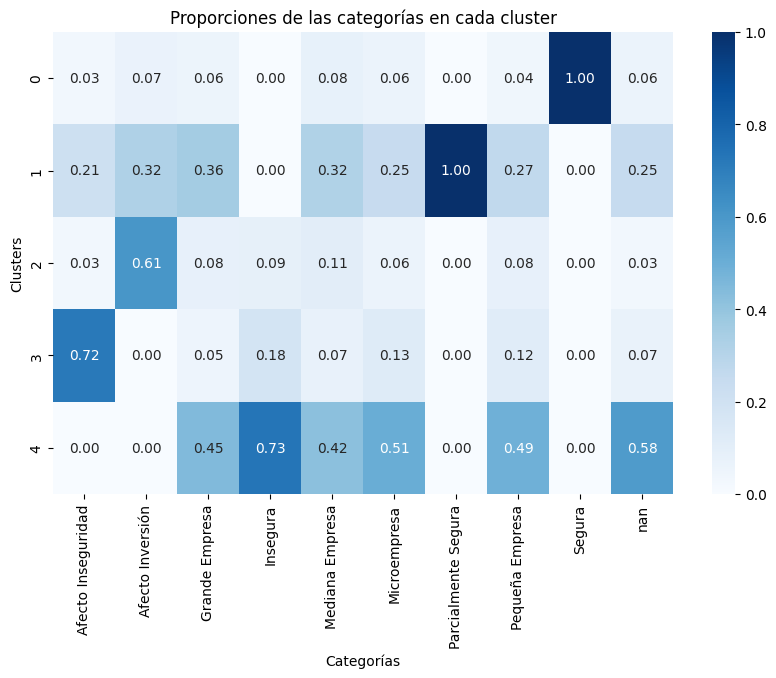

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agregar la asignación de clusters a los datos
datos['cluster'] = clusters

# Contar las frecuencias de cada categoría en cada cluster
cluster_freq = datos.groupby('cluster').apply(lambda x: x.iloc[:, :-1].stack().value_counts()).unstack().fillna(0)

# Calcular la proporción de cada categoría en cada cluster
cluster_prop = cluster_freq.div(cluster_freq.sum(axis=0), axis=1)

# Visualizar las proporciones de las categorías en forma de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_prop, annot=True, cmap='Blues', fmt=".2f")
plt.title('Proporciones de las categorías en cada cluster')
plt.xlabel('Categorías')
plt.ylabel('Clusters')
plt.show()

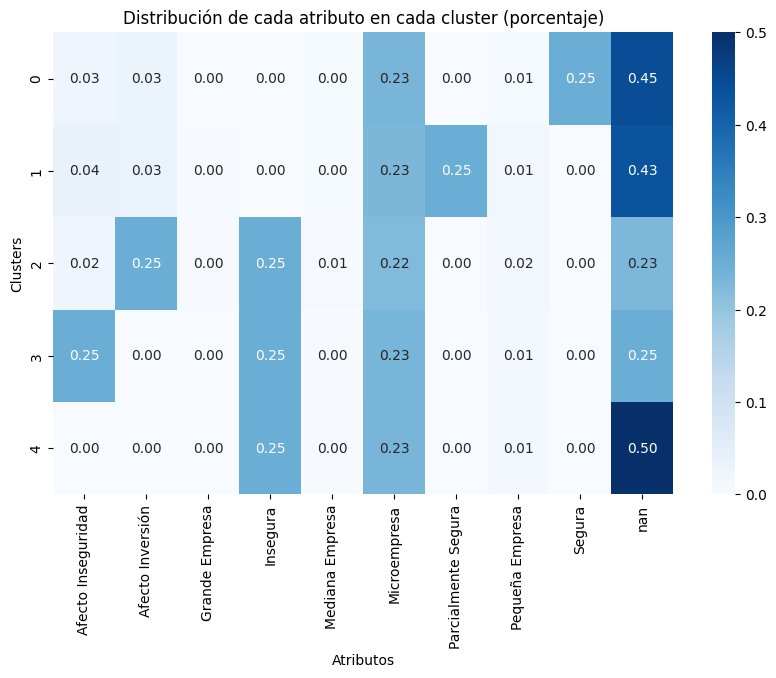

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normalizar cada fila del DataFrame cluster_prop
normalized_cluster_prop = cluster_prop.div(cluster_prop.sum(axis=1), axis=0)

# Visualizar las proporciones normalizadas de las categorías en forma de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_cluster_prop, annot=True, cmap='Blues', fmt=".2f")
plt.title('Distribución de cada atributo en cada cluster (porcentaje)')
plt.xlabel('Atributos')
plt.ylabel('Clusters')
plt.show()

iteracion 2

In [7]:
from kmodes.kmodes import KModes

# Seleccionar las columnas relevantes
datos = ECN2022EXP[["F4", "P56","P21","P32"]]



# Cambiar los valores según las correspondencias dadas
datos['P21'] = datos['P21'].replace({1: 'Solicito Credito',2: 'No Solicito Credito'})
datos['P32'] = datos['P32'].replace({1: 'El clima de Negocio es excelente',2: 'El clima de Negocio es Bueno',
                                     3: 'El clima de Negocio es Regular',4: 'El clima de Negocio es Malo',5: 'El clima de Negocio es Pesimo'})
datos['F4'] = datos['F4'].replace({1: 'Microempresa', 2: 'Pequeña Empresa', 3: 'Mediana Empresa', 4: 'Grande Empresa'})
datos['P56'] = datos['P56'].replace({1: 'Seguridad empresarial', 2: 'Insegura Empresarial', 3: 'Parcialmente Segura Empresarial'})


# Convertir las variables numéricas a categóricas si es necesario
datos['P21'] = datos['P21'].astype(str)
datos['P32'] = datos['P32'].astype(str)
datos['F4'] = datos['F4'].astype(str)
datos['P56'] = datos['P56'].astype(str)
# Crear un objeto KModes
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

# Ajustar el modelo a tus datos
clusters = km.fit_predict(datos)

# Mostrar los clusters asignados a cada instancia
print(clusters)

C:\Users\USER\AppData\Local\Temp\ipykernel_15908\330053076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['P21'] = datos['P21'].replace({1: 'Solicito Credito',2: 'No Solicito Credito'})
C:\Users\USER\AppData\Local\Temp\ipykernel_15908\330053076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['P32'] = datos['P32'].replace({1: 'El clima de Negocio es excelente',2: 'El clima de Negocio es Bueno',
C:\Users\USER\AppData\Local\Temp\ipykernel_15908\330053076.py:12: SettingWithCopyWarning: 
A 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 159223.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 113769, cost: 173589.0
Run 2, iteration: 2/100, moves: 18046, cost: 173589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1600, cost: 197455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 193341.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 173089.0
Best run was number 1
[1 1 1 ... 1 1 1]


C:\Users\USER\AppData\Local\Temp\ipykernel_15908\40988965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['cluster'] = clusters
C:\Users\USER\AppData\Local\Temp\ipykernel_15908\40988965.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_freq = datos.groupby('cluster').apply(lambda x: x.iloc[:, :-1].stack().value_counts()).unstack()


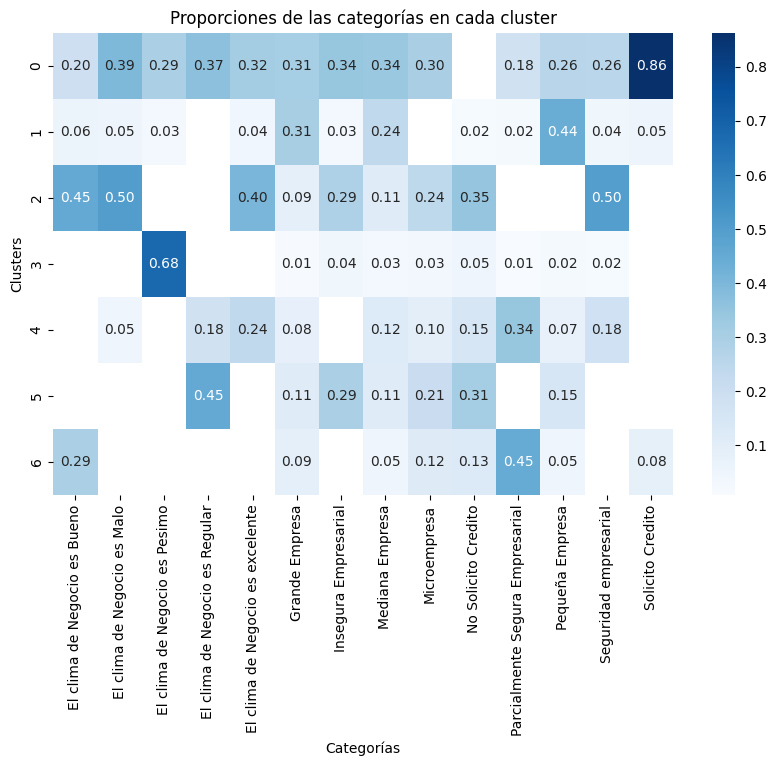

In [19]:
# Agregar la asignación de clusters a los datos
datos['cluster'] = clusters

# Contar las frecuencias de cada categoría en cada cluster
cluster_freq = datos.groupby('cluster').apply(lambda x: x.iloc[:, :-1].stack().value_counts()).unstack()

# Calcular la proporción de cada categoría en cada cluster
cluster_prop = cluster_freq.div(cluster_freq.sum(axis=0), axis=1)

# Visualizar las proporciones de las categorías en forma de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_prop, annot=True, cmap='Blues', fmt=".2f")
plt.title('Proporciones de las categorías en cada cluster')
plt.xlabel('Categorías')
plt.ylabel('Clusters')
plt.show()

In [17]:
from kmodes.kmodes import KModes

# Seleccionar las columnas relevantes
datos = ECN2022EXP[["F4", "P56","P21","P32"]]



# Cambiar los valores según las correspondencias dadas
datos['P21'] = datos['P21'].replace({1: 'Solicito Credito',2: 'No Solicito Credito'})
datos['P32'] = datos['P32'].replace({1: 'El clima de Negocio es excelente',2: 'El clima de Negocio es Bueno',
                                     3: 'El clima de Negocio es Regular',4: 'El clima de Negocio es Malo',5: 'El clima de Negocio es Pesimo'})
datos['F4'] = datos['F4'].replace({1: 'Microempresa', 2: 'Pequeña Empresa', 3: 'Mediana Empresa', 4: 'Grande Empresa'})
datos['P56'] = datos['P56'].replace({1: 'Seguridad empresarial', 2: 'Insegura Empresarial', 3: 'Parcialmente Segura Empresarial'})


# Convertir las variables numéricas a categóricas si es necesario
datos['P21'] = datos['P21'].astype(str)
datos['P32'] = datos['P32'].astype(str)
datos['F4'] = datos['F4'].astype(str)
datos['P56'] = datos['P56'].astype(str)
# Crear un objeto KModes
km = KModes(n_clusters=7, init='Huang', n_init=4, verbose=1)

# Ajustar el modelo a tus datos
clusters = km.fit_predict(datos)

# Mostrar los clusters asignados a cada instancia
print(clusters)

C:\Users\USER\AppData\Local\Temp\ipykernel_15908\2901692.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['P21'] = datos['P21'].replace({1: 'Solicito Credito',2: 'No Solicito Credito'})
C:\Users\USER\AppData\Local\Temp\ipykernel_15908\2901692.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['P32'] = datos['P32'].replace({1: 'El clima de Negocio es excelente',2: 'El clima de Negocio es Bueno',
C:\Users\USER\AppData\Local\Temp\ipykernel_15908\2901692.py:12: SettingWithCopyWarning: 
A value 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 149847.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3664, cost: 185173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 29612, cost: 133698.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10716, cost: 162161.0
Best run was number 3
[0 0 0 ... 0 0 0]


C:\Users\USER\AppData\Local\Temp\ipykernel_15908\2645532289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['cluster'] = clusters
C:\Users\USER\AppData\Local\Temp\ipykernel_15908\2645532289.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_freq = datos.groupby('cluster').apply(lambda x: x.iloc[:, :-1].stack().value_counts()).unstack().fillna(0)


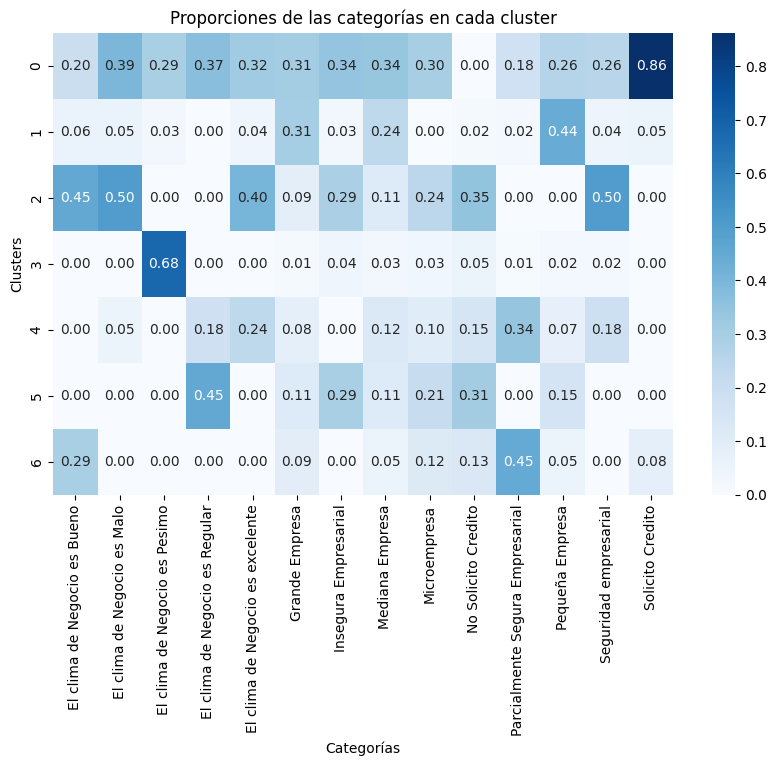

In [21]:
# Agregar la asignación de clusters a los datos
datos['cluster'] = clusters

# Contar las frecuencias de cada categoría en cada cluster
cluster_freq = datos.groupby('cluster').apply(lambda x: x.iloc[:, :-1].stack().value_counts()).unstack().fillna(0)

# Calcular la proporción de cada categoría en cada cluster
cluster_prop = cluster_freq.div(cluster_freq.sum(axis=0), axis=1)

# Visualizar las proporciones de las categorías en forma de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_prop, annot=True, cmap='Blues', fmt=".2f")
plt.title('Proporciones de las categorías en cada cluster')
plt.xlabel('Categorías')
plt.ylabel('Clusters')
plt.show()

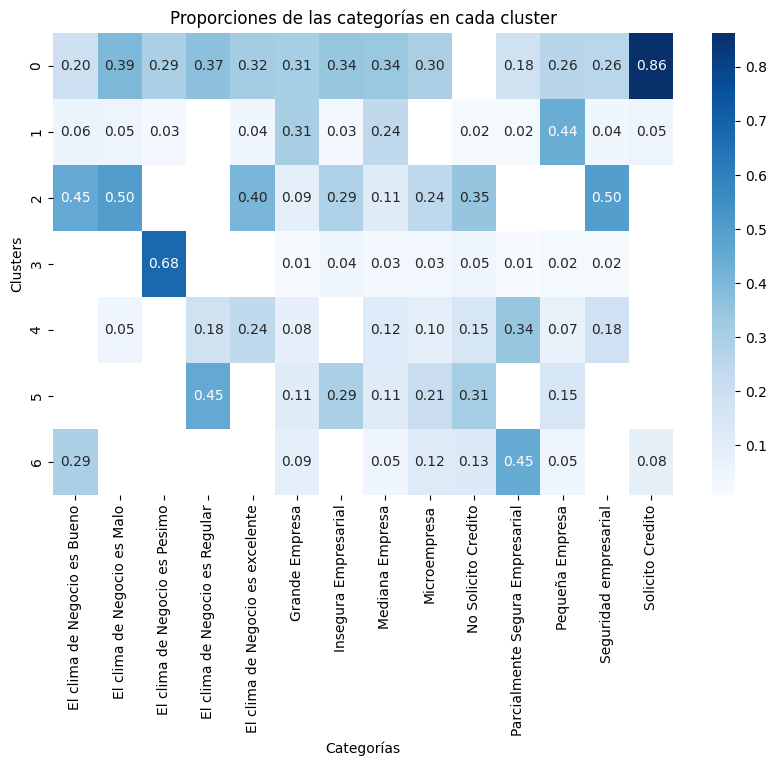